<h1><b>BIG DATA & DATA MINING</b></h1>
<ul>
  <li>Nama : Haikal Raditya Fadhilah</li>
  <li>NIM : 21.11.3910</li>
  <li>Kelas : Informatiks 02</li>
</ul>

<h2><b>IMPORT LIBARY</b></h2>

In [3]:
import pandas as pd
import numpy as np
import random
from google.colab import drive
from matplotlib import pyplot as plt
import seaborn as sns

<h2><b>MOUNTING DRIVE STORAGE</b></h2>

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h2><b>IMPORT DATASET</b></h2>

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Big Data & Data Mining/Tugas 3/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2><b>MELIHAT INFORMASI DATASET</b><h2>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h2><b>MELIHAT DESKRIPSI DATASET</b></h2>

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2><b>MELIHAT JUMLAH DATA YANG KOSONG</b></h2>

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h2><b>MELIHAT NAMA KOLOM BERSERTA JUMLAHNYA</b></h2>

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
print("Jumlah Kolom Pada Dataset Titanic : ", len(df.columns))

Jumlah Kolom Pada Dataset Titanic :  12


<h2><b>MENGHAPUS KOLOM PADA DATASET</b></h2>

In [12]:
# Menghapus Kolom Embarked
df.drop('Embarked',axis=1,inplace=True)

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin'],
      dtype='object')

<h2><b>MENGISI DATA KOLOM UMUR DENGAN RATA-RATA</b><h2>

In [14]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [15]:
# Melihat Data Null Pada Kolom Age
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

<h2><b>MENGISI DATA NULL KOLOM CABIN DENGAN JUMLAH DATA TERBANYAK</b></h2>

In [16]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [17]:
df['Cabin'].fillna(df['Cabin'].mode()[1],inplace=True)

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
dtype: int64

<h2><b>MELIHAT KORELASI ANTAR VARIABEL</b></h2>

In [19]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<ipython-input-20-a4f1cdc429d7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True,fmt='.2f')


<Axes: title={'center': 'Melihat Korelasi Antar Variable Menggunakan Heatmap'}>

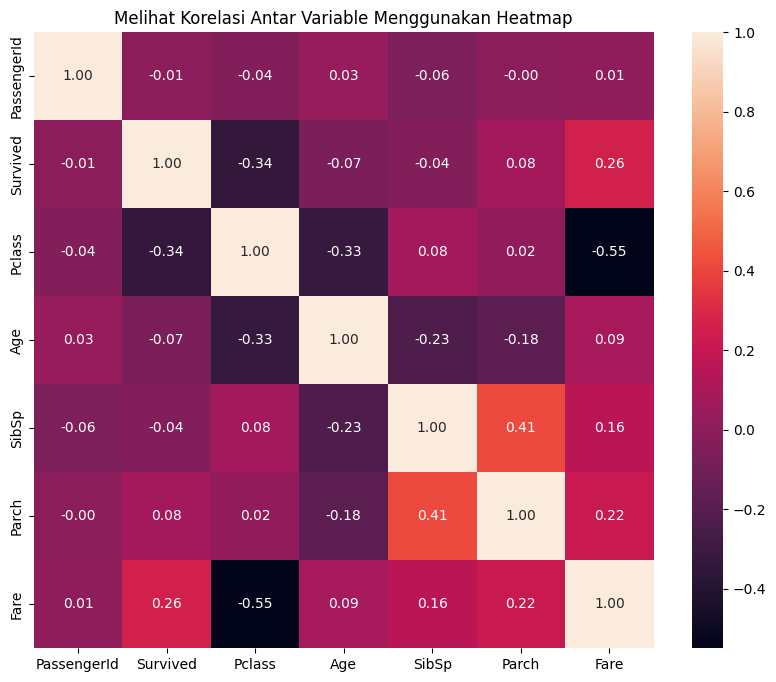

In [20]:
# Menampilkan Korelasi Dengan Heatmap
plt.figure(figsize=(10,8))
plt.title("Melihat Korelasi Antar Variable Menggunakan Heatmap")
sns.heatmap(data=df.corr(),annot=True,fmt='.2f')

<h2><b>PENUGASAN</b></h2>

<h3><b>SOAL</b></h3>
<ol>
  <li>Lakukan analisa outliers dengan memvisualisasikan data tersebut dengan menggunakan : </li>
  <ol type="a">
    <li>Scatter Plot</li>
    <li>Box Plot</li>
  </ol>
  <li>Tangani outliers / data pencilan tersebut</li>
  <li>Visualisasikan lagi setelah data pencilan / outliers di tangani dan amati perbedaannya</li>
</ol>

<h3><b>1. Lakukan analisa outliers dengan memvisualisasikan data tersebut</b></h3>

<h3><b>Scatter Plot</b></h3>

In [21]:
jumlah_umur_penumpang = df.groupby('Age',as_index=False).size().rename({'size':'jumlah'},axis='columns')

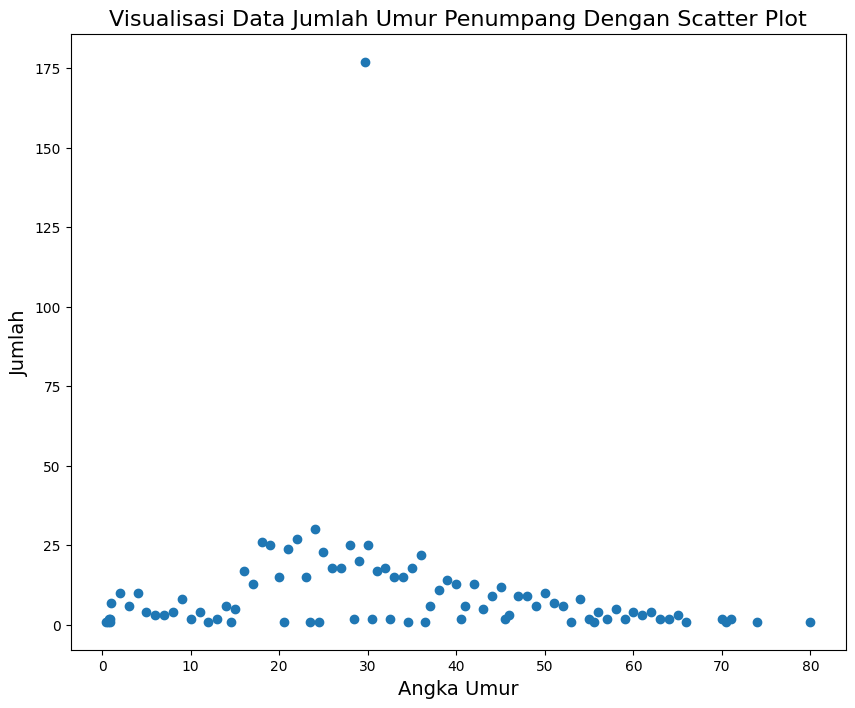

In [22]:
# Analisa Outliers Dengan Scatter Plot
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(jumlah_umur_penumpang['Age'],jumlah_umur_penumpang['jumlah'])
plt.title("Visualisasi Data Jumlah Umur Penumpang Dengan Scatter Plot",fontsize=16)
plt.xlabel('Angka Umur',fontsize=14)
plt.ylabel("Jumlah",fontsize=14)
plt.show()

<h3><b>Box Plot</b></h3>

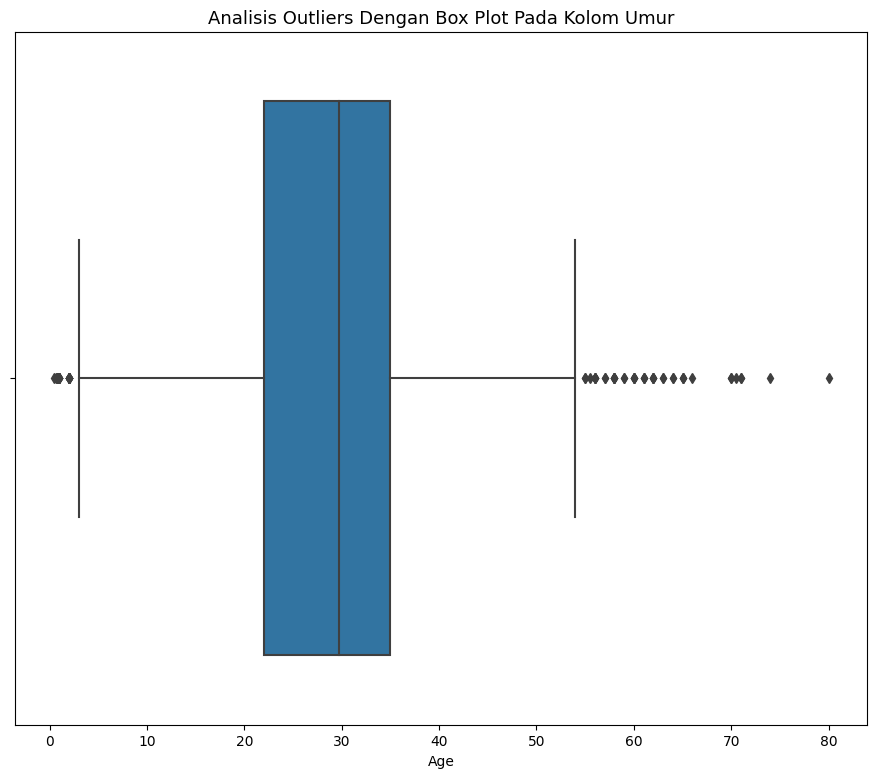

In [23]:
# Visualisasi Data Analisis Dengan Box Plot
fig,ax = plt.subplots(figsize=(11,9))
sns.boxplot(x=df['Age'])
plt.title("Analisis Outliers Dengan Box Plot Pada Kolom Umur",fontsize=13)
plt.show()

<h3><b>2.Tangani Outliers / data Pencilan tersebut</b></h3>

In [24]:
# Membuat Fungsi Untuk Membersihkan Outliers
def clear_outliers (dataset,kolom):
    Q1 = dataset[kolom].quantile(0.25)
    Q3 = dataset[kolom].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5 * IQR;
    max_iqr = Q3 + 1.5 * IQR;
    return dataset.loc[(dataset[kolom] >= min_iqr) & (dataset[kolom] <= max_iqr)].reset_index(drop=True)

In [25]:
df = clear_outliers(df,'Age')

<h2><b>3. Visualisasikan lagi setelah data pencilan / outliers di tangani dan amati perbedaannya</b></h2>

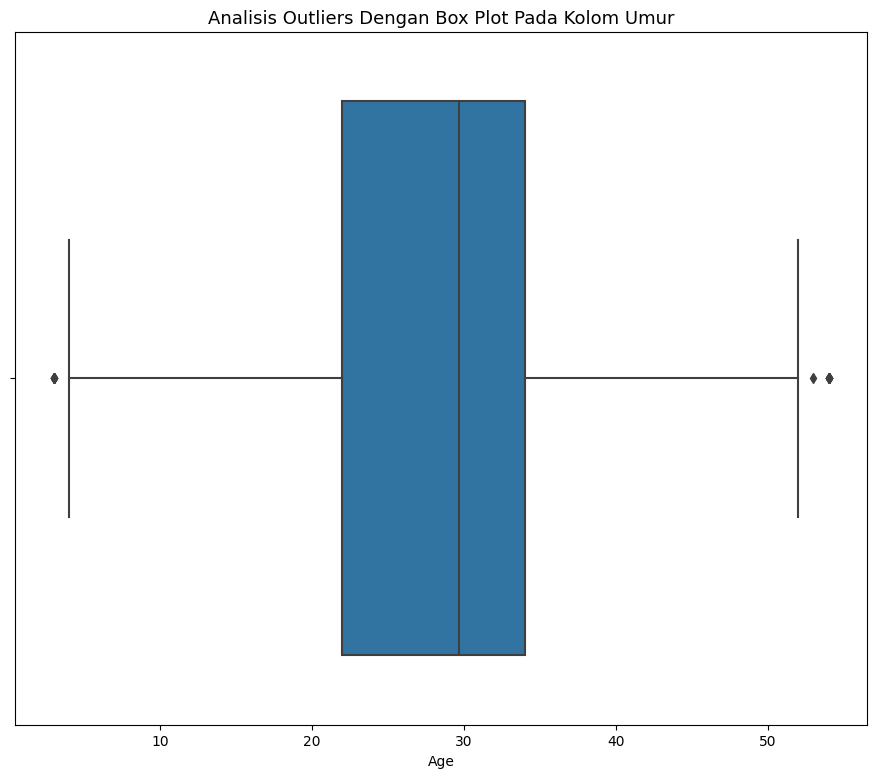

In [26]:
# Visualisasi Data Analisis Dengan Box Plot
fig,ax = plt.subplots(figsize=(11,9))
sns.boxplot(x=df['Age'])
plt.title("Analisis Outliers Dengan Box Plot Pada Kolom Umur",fontsize=13)
plt.show()

<h2><b>Hasil Pengamatan</b></h2>
<p>Pada Kolom Umur pada dataset saat di visualisasikan menggunakanan Box Plot terdapat banyak data pencilan,kita memerlukan pembersihan data pencilan tersebut untuk mendapatkan hasil analisis yang tepat,bisa kita lihat bahwa setelah melakukan Clear Outliers,data outliers pada kolom age mulai berkurang.walaupun tidak bersih sekali namun data outliers berkurang dengan signifikan</p>